# Un exemple de système chaotique
**Modélisation Numérique en Physique - S2**

**Miniprojet 2**

**ARGUELLO Camilo**


## Tableau

1. Introduction
2. Croissance exponnentielle
3. Croissance maximale
4. Diagramme de bifurcation
5. Exposant de Lyapunov
6. Conclusion



## Introduction

Quel est le lien entre des scénarios tels que la modélisation de la population de lapins, la convection thermique d'un fluide ou le flux de neurones dans notre cerveau ? Ils sont tous des exemples des systèmes chaotiques. Dans le cadre de cette calepin, on va aborder la notion de ce type de systèmes avec un exemple de la population de lapins.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Croissance des lapins


On peut modeliser la population de lapins dans un scenario où il n'y a pas des obstacles (ressources limités ou prédateurs) pour sa croissance. Avec un $\alpha$ constante, on peut montrer que pour l'année $p$, la taux de croissance peut dévenir exponentielle.

$$
n_p = \alpha^{p}n_O
$$

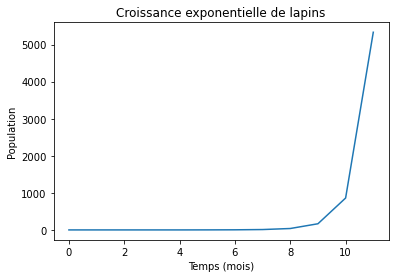

In [2]:
N = 12 # months
annee = np.arange(N)
L = np.zeros(annee.shape, dtype="int64")
alpha = 1.2 # Let's suppose a growth of 1.2

L[0] = 1
for i in range(len(annee) - 1):
    L[i + 1] = (alpha ** i) * L[i]

plt.plot(annee, L)
plt.title("Croissance exponentielle de lapins")
plt.xlabel("Temps (mois)")
plt.ylabel("Population")
plt.show()

## Avec une croissance maximale 

On peut maintenant vérifier le cas de $\alpha$ qui dépend d'un rapport de croissance. Pour cela, on va définir un numéro de lapins maximal avec les contraintes de ressources, prédateurs, etc. Ainsi, on va ajouter une constante de croissance $1 < r < 4$.

$$ n_{i+1} = r \left( 1 - \frac{n_i}{n_{\max}} \right) n_i $$

Où, $n_{\max}$, $r$ sont des valeur constantes.

In [3]:
def get_growth(x, r, x_max=60, temps=np.arange(12)):
    """
    @description Cette fonction retourne la valeur de population selon à partir d'une quantité donnée, ainsi que d'une taux de croissance
    @param {array} x - Population
    @param {float} r - Taux de croissance
    @param {int} x_max - Max population (optional)
    @param {array} temps - Array of Months (optional)
    """
    for i in range(len(temps) - 1):
        alpha = 1 - ( x[i] / x_max)
        x[i + 1] = r * ( alpha ) * x[i]
    return x

def plot_growth(temps, x):
    """
    @description Cette fonction montre la croissance d'une population au cours du temps
    """
    plt.plot(temps, x)
    plt.title("Croissance de lapins")
    plt.xlabel("Temps (mois)")
    plt.ylabel("Population")
    plt.show()

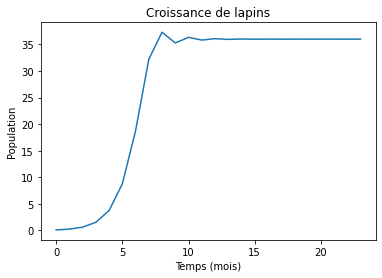

In [4]:
N = 24 # Months
temps = np.arange(N)

# I consider L as the variable from the formula as n
L = np.zeros(temps.shape, dtype=np.float64)

r = 2.5 # growth
L_max = 60 # I consider as much 60 rabbits
L[0] = .1 # x_0 = 0.1

L = get_growth(L,r,x_max=L_max,temps=temps)
plot_growth(temps, L)

Avec les valeurs pour $r=2.5$ et $x_0=0.1$ on voit que la croissance de lapins s'estabilise après une certaine temps. De même, on peut souligner que la croissance de population reste à une seule valeur stable. Dans cette exemple $x(t \geq 15) \approx  35$.

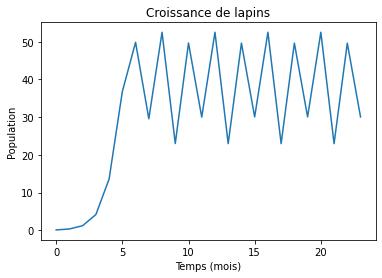

In [5]:
# I consider L as the variable from the formula as n
L = np.zeros(temps.shape, dtype=np.float64)

r = 3.5 # growth
L[0] = .1 

L = get_growth(L,r,temps=temps)
plot_growth(temps, L)

Indépendamment du conditions initiales $x_0$, au final la population se stabilisera toujours. Cependant, à partir de valeurs $r > 3$, la graphique tend à se stabiliser plus rapidement mais cette fois, elle ne se stabilise pas vers une seule valeur constante. C'est à dire, la graphique oscille entre deux valeurs. Liée à notre exemple, elle montre une période où la population est plus grande, et puis après plus petite.

## Diagramme de bifurcation

On va maintenant à vérifier l'effet de ce comportament lors de $r > 3$. Pour cela on considére une equation généralisé $f(x) = r ( 1 - x ) x $

In [6]:
def F(x, r=2.5):
    """
    @description Cette fonction retourne la valeur de croissance selon une population et un taux de croissance
    @param {Numpy.Array} x Array de population 
    @param {float | Numpy.array} r La taux de croissance
    @returns {Numpy.array} La croissance de population
    """
    
    return r * ( 1 - x ) * x # O(n) Probably linear time

In [7]:

N = 1000 # Lets consider 1000 steps between 2.5 and 4
n_max = 1000 # How many point we store in the x array

# All the steps between 2.5 and 4 with a N steps
r_rang = np.linspace(2.5, 4, N) 

# Here I create a global variable to store all the last 100 points for each iteration
global_X = list()

# Going from 0 .. 999 (all the points from 2.5 to 4)
for i in range(len(r_rang) - 1):
    # For each iteration I compare each r
    r = r_rang[i] 

    # For each iteration i create a new array to be updated
    # It has a length of 1000
    x = np.zeros(n_max, dtype=np.float64)
    x[0] = .00001

    # For each point of r, i check 1000 times the output of F(x)
    for j in range(n_max - 1):  # O(m)
        x[j + 1] = F(x[j], r)   # O(n * m)

    # Store in the global array the last 100 items of the x array
    global_X.append(x[-100:])

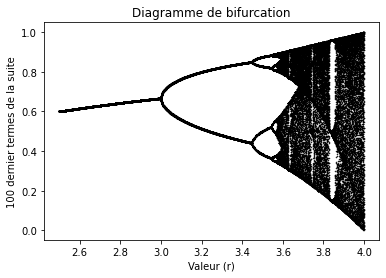

In [8]:
fig, ax = plt.subplots(1)

# Here I plot the values
# I create an array of 100 items at each point of r -> xx
# For each point I plot the last 100 items of x array -> yy
for i in range(len(global_X)):
    xx = np.full(len(global_X[i]), r_rang[i])
    yy = np.array(global_X[i])
    ax.plot(xx,yy,".",c="black", markersize=1)

ax.set_title("Diagramme de bifurcation")
ax.set_xlabel("Valeur (r)")
ax.set_ylabel("100 dernier termes de la suite")
plt.show()

Lorsque $r$ commence à augmenter, les pics du graphique sont séparés en deux, puis chacun en deux autres, car la période a été doublé, en anglais ce phénomène est connu sous le nom de : *Period-doubling bifurcation* qui se produit lorsqu'un léger changement dans les paramètres d'un système qui fait émerger un nouveau chemin périodique à partir d'un chemin périodique existant. Après une valeur de $ r \approx 3.56 $, le chaos est généré dans le système, où la population ne pourra jamais se stabiliser. Pour cette biffurcation, les valeurs prises par $x_0$ n'affectent pas le résultat final.

## Exposant de Lyapunov

On va maintenant vérifier la sensibilité du système liée au paramètre initiale $r$. Pour cela on utilise l'exposant de Lyapunov. Pour faire le calcule numérique, il faut considerer notre fonction $f(x)$. Ensuite on va considérer sa dérivée.

$$ f(x) = r ( 1 - x ) x $$

$$ f'(x) = r x \frac{d}{d_x} ( 1 - x )  + ( 1 - x ) \frac{d}{d_x} x  $$

$$ f'(x) = r ( 1 - 2x) $$

Finalement, on peut calculer l'expression d'exposant de la manière suivante:

$$ \lambda = \lim\limits_{n \rightarrow \infty} \frac{1}{n} \sum_{i=0}^{n-1} \log | f^{\prime} (x_i)| $$

In [9]:
## Here I store the Lyapunov exponent
lamb = np.zeros(N)
x = (1 / N) * np.ones(n_max, dtype=np.float64)
x[0] = .00001

# Going from 0 .. 1000 (all the points from 2.5 to 4)
for i in range(len(r_rang) ):
    # Get the x as array
    x = F(x, r_rang)

    # F'(x)
    F_p = r_rang * ( 1 - (2 * x))
    
    # Lyapunov
    lamb += np.log(abs(F_p))

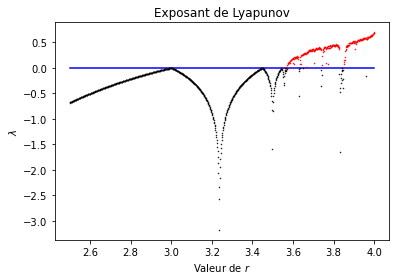

In [10]:
fig, ax = plt.subplots(1)

# Horizontal line
ax.plot(r_rang, np.zeros(r_rang.shape), c="blue")

# Plot the points under 0
xx1 = r_rang[ lamb < 0 ]
yy1 = lamb[ lamb < 0 ] / N
ax.plot(xx1,yy1,'.',markersize=1 , c="black")

# Plot the points over 0
xx2 = r_rang[ lamb > 0 ]
yy2 = lamb[ lamb > 0 ] / N
ax.plot(xx2,yy2,'.',markersize=1, c="red")

ax.set_title("Exposant de Lyapunov")
ax.set_ylabel("$\lambda$")
ax.set_xlabel("Valeur de $r$")
plt.show()

A partir de $r\approx3.56$ le modèle devient instable, tel que comme on avait déjà vu sur le diagramme de bifurcation. On voit que le système est aussi très sensible aux changements initiales de $r$ mais pas beaucoup avec des changements de $x_0$.

## Conclusion

Nous avons étudié un système chaotique avec un exemple de population de lapins. On a vérifié l'importance d'avoir des conditions initiales car elles peuvent influencer le résultat final. D'après, nous avons fait une analyse sur les limites de nos conditions initiales, dans cet exemple si on fait varier le taux de croissance ($r$) entre `2.5` et `4` et $x_0$ entre `0.1` et `0.00001`. On a montré que si on a des valeurs de $r>3$ le système devient chaotique, car si $r<3$ il peut se stabiliser initialement vers une valeur unique, mais après $r>3$ il converge vers différentes valeurs ce qui conduit à un chaos.